# Logistic Regression

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
import math

**Challenger disaster, Part I. **

On January 28, 1986, a routine launch was anticipated for the Challenger space shuttle. Seventy-three seconds into the flight, disaster happened: the shuttle broke apart, killing all seven crew members on board. An investigation into the cause of the disaster focused on a critical seal called an O-ring, and it is believed that damage to these O-rings during a shuttle launch may be related to the ambient temperature during the launch. 

The table below summarizes observational data on O-rings for 23 shuttle missions, where the mission order
is based on the temperature at the time of the launch. Temp gives the temperature in Fahrenheit, Damaged represents the number of damaged O-rings, and Undamaged represents the number of O-rings that were not damaged.

In [22]:
Temperature_str = '53 57 58 63 66 67 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 81'
Temperature_str = Temperature_str.split(' ')
Temperature = [int(i) for i in Temperature_str]
Damaged_str = '5 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0'
Damaged_str = Damaged_str.split(' ')
Damaged = [int(i) for i in Damaged_str]
data_tuples = list(zip(Temperature,Damaged))
df = pd.DataFrame(data_tuples, columns=['Temperature', 'Damaged'])
df['Undamaged'] = 6 - df.Damaged
df

,Temperature,Damaged,Undamaged
0,53,5,1
1,57,1,5
2,58,1,5
3,63,1,5
4,66,0,6
5,67,0,6
6,67,0,6
7,67,0,6
8,68,0,6
9,69,0,6


## a
### Each column of the table represents a different shuttle mission. Examine these data and describe what you observe with respect to the relationship between temperatures and damaged O-rings.

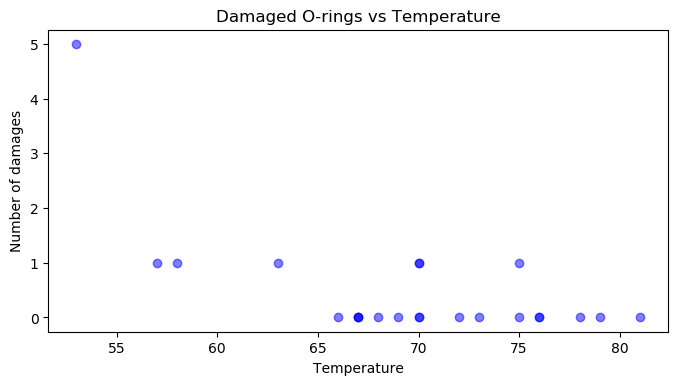

In [31]:
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(df.Temperature, df.Damaged,alpha=0.5, color='blue')
plt.xlabel('Temperature')
plt.ylabel('Number of damages')
plt.title('Damaged O-rings vs Temperature')
plt.show()

Observing the scatter plot we can see an increase in damaged O-rings when the ambient temperature is below 65F.

## (b) 
### Failures have been coded as 1 for a damaged O-ring and 0 for an undamaged O-ring, and a logistic regression model was fit to these data. A summary of this model is given below. Describe the key components of this summary table in words.

The outcome variable of the model is logit of p, where p is the probability of getting a damaged O-ring. 

The intercept is statistically relevant given that its p-value is 0.0004, this means that if the null hypothesis is true, the intercept is zero, the probability of getting an intercept of 11.663 is extremely rare.

The intercept is logit p when the temperature is zero but this value does not have a physical meaning because it is outside the temperature interval where the experiments were performed.

The Temperature coeficient is statistically relevant given that its p-value is almost 0.

Since temperature is always positive and the coefficient of this variable is negative (-0.2162), an increase in temperature would lower the probability of getting a damaged O-ring. 

## (c) 
### Write out the logistic model using the point estimates of the model parameters.

ln(p/(1-p)) = 11.663 - 0.2162 * Temperature

## (d) 
### Based on the model, do you think concerns regarding O-rings are justified? Explain.


Taking into account that the ambient temperature in Florida can be as low as 25 to 30 °F (−4 to −1 °C)  during winter time and the experiments showed that the probability of O-rings damage increases heavily with the descent of temperature, the concerns regarding the O-rings were totally justified.

I consider that the main problem was the experimental design of the tests. They did not test the performance of the Challenger Space Shuttle in all the possible ambient temperatures. In addition, the tests that actually were done had not been equally balanced in the whole temperature range, for that, among the 23 tests only 4 tests were made between 50 and 65 F.


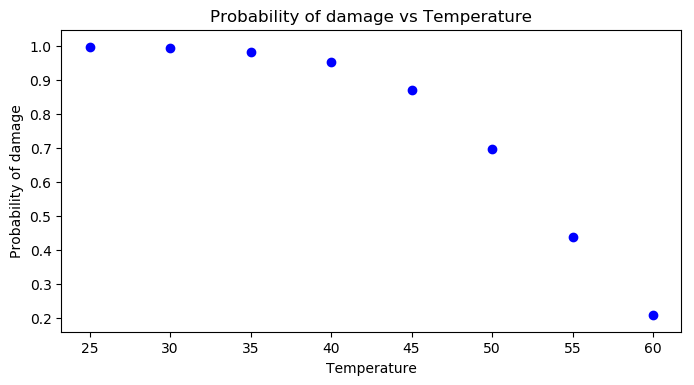

In [44]:
temp = range(25,65,5)
p = [math.exp(11.663-0.2166*t)/(1+math.exp(11.663-0.2166*t)) for t in temp ]
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(temp, p, color='blue')
plt.xlabel('Temperature')
plt.ylabel('Probability of damage')
plt.title('Probability of damage vs Temperature')
plt.show()